<a href="https://colab.research.google.com/github/AlexeyTri/Timeseries/blob/main/Lesson_1_Time_Series_Forecasting_Problems_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from datetime import datetime, timedelta

from google.colab import files
%matplotlib inline

import scipy as sc
import sklearn
from sklearn.linear_model import LinearRegression


# Timeseries in Retail

In [9]:
rt_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/retail_2products.csv', sep=';', parse_dates=['Date']).set_index('Date')
rt_df.head()

,Store_id,SKU_id,Promo,Demand,Regular_Price,Promo_Price
Date,,,,,,
2015-01-01,1,1,NaN,22.0,163.78,NaN
2015-01-02,1,1,NaN,41.0,163.78,NaN
2015-01-03,1,1,NaN,35.0,163.78,NaN
2015-01-04,1,1,NaN,72.0,163.78,NaN
2015-01-05,1,1,NaN,25.0,163.78,NaN


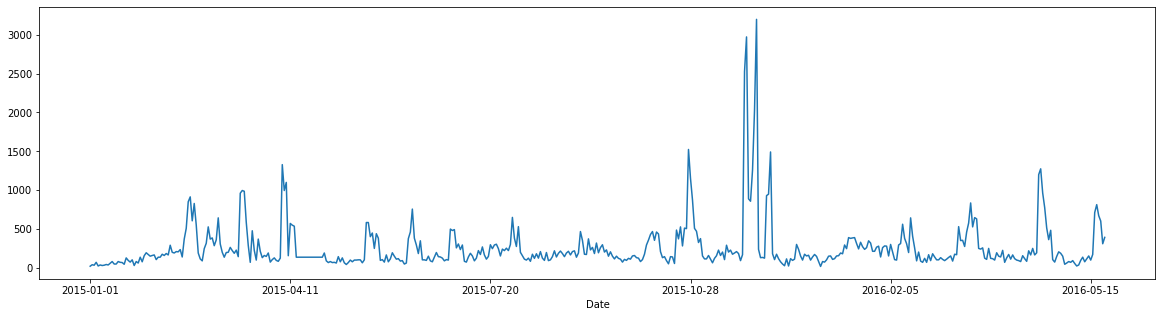

In [11]:
rt_df[(rt_df['Store_id'] == 1) & (rt_df['SKU_id']==1)]['Demand'].plot(figsize=(20,5))

In [12]:
rt_df.groupby(['Store_id', 'SKU_id']).count()

Promo  Demand  Regular_Price  Promo_Price
Store_id SKU_id                                           
1        1         121     508            536          121
         2          69     508            536           69
2        1         121     508            536          121
         2          69     508            536           69
3        1         120     508            536          120
...                ...     ...            ...          ...
108      2           0       0              3            0
109      1           6       0             10            6
         2           4       0             10            4
110      1           6       0             10            6
         2           4       0             10            4

[220 rows x 4 columns]

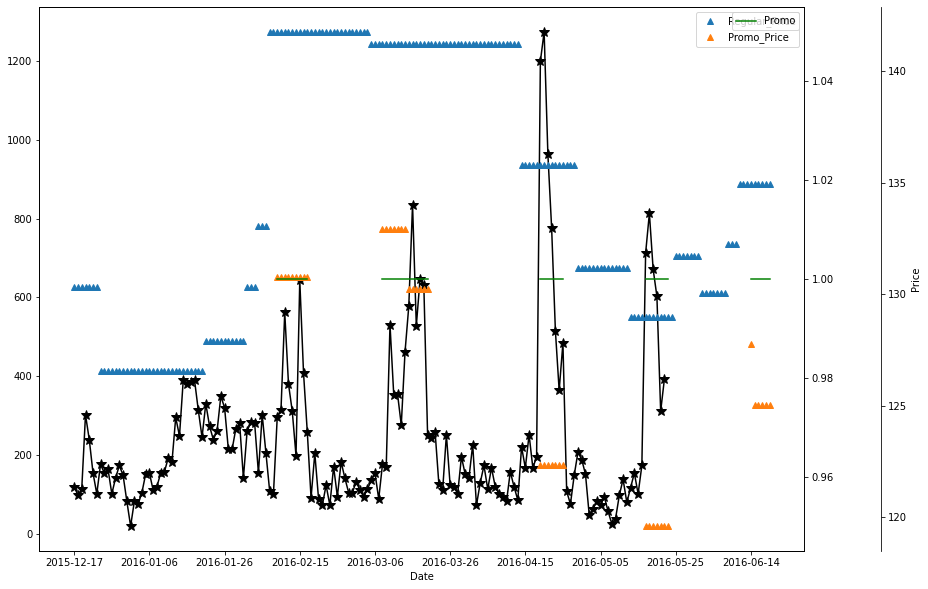

In [27]:
# Driver analysis
fig, ax = plt.subplots(figsize=(25, 10))

# создаем дополнительные оси х, справа появляются дополнительные оси у
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Price')
rspine = ax2.spines['right'] # скрыли правую ось
rspine.set_position(('axes', 1.1))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.55)

rt_df[(rt_df['Store_id'] == 1) & (rt_df['SKU_id']==1)]['Demand'].tail(186).plot(ax=ax,style='k-', marker='*', markersize=10.0)
rt_df[(rt_df['Store_id'] == 1) & (rt_df['SKU_id']==1)][['Regular_Price','Promo_Price']].tail(186).plot(ax=ax2, style='^', linewidth=0.0)
rt_df[(rt_df['Store_id'] == 1) & (rt_df['SKU_id']==1)][['Promo']].tail(186).plot(ax=ax3, style='g-')

lines = ax.get_lines()+ax2.get_lines()+ax3.get_lines()

основная задача анализа врменных рядов в ритейле, это выявление основных драйверов влияния на спрос

# Timeseries in Finance

In [29]:
dj_df = pd.read_csv('https://query.data.world/s/5wc4pg4jsopcqdvwn2l6o7iefmn4du', parse_dates=['Date']).set_index('Date')
dj_df.head()

,Value
Date,
1977-09-02,872.31
1977-09-09,857.04
1977-09-16,856.81
1977-09-23,839.14
1977-09-30,847.11


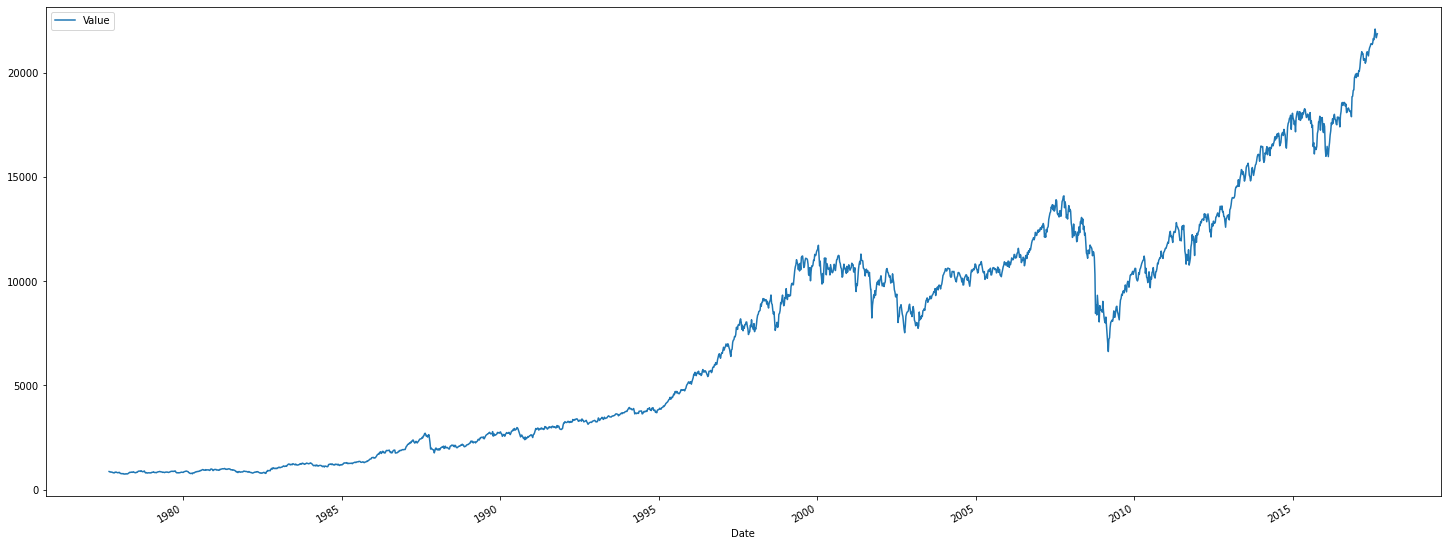

In [31]:
dj_df.plot(figsize=(25,10))

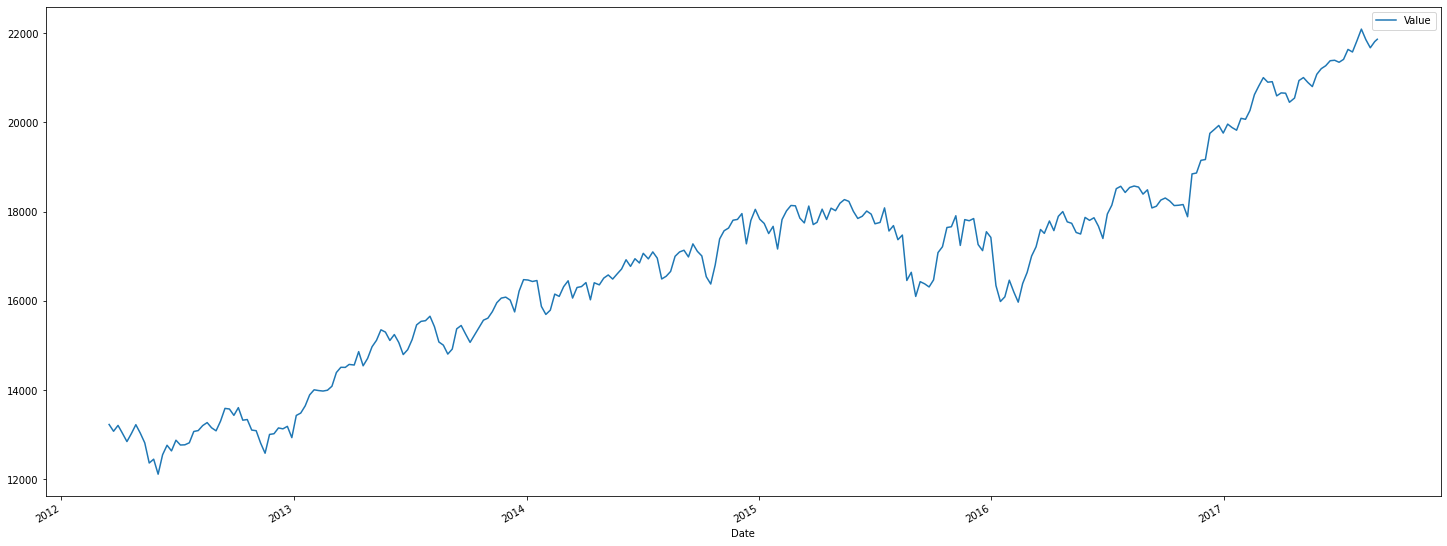

In [32]:
dj_df.tail(286).plot(figsize=(25,10))

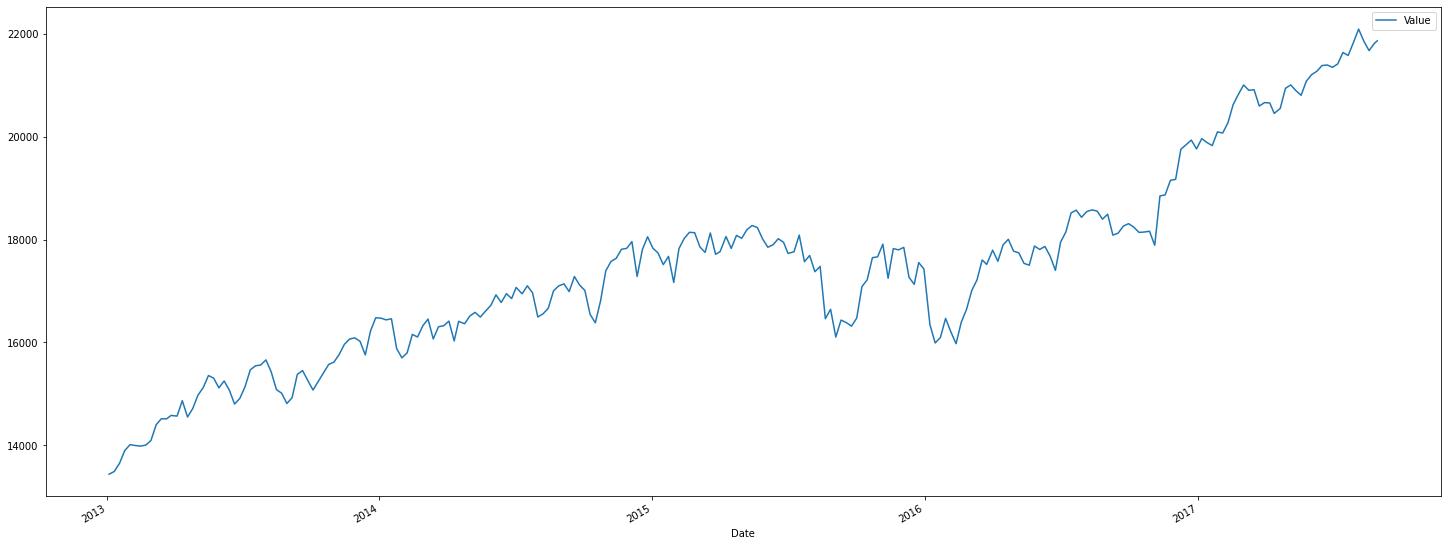

In [34]:
dj_df['2013-01-01':].plot(figsize=(25,10))

основная задача в области финансов, это выявление основных трендов и триггеров, влияющих на них

# Timeseries in Energy Market

In [35]:
en_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/energy_consump.csv', parse_dates=['Date'], decimal='.', index_col='Date', dayfirst=False)
en_df.head(10)

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,Center,FZSZOE27,168969.315,-8.0,-18.6,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,Center,FZSZOE27,164772.821,-9.7,-19.5,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,Center,FZSZOE27,169338.900,-13.3,-18.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-09,Center,FZSZOE27,170479.031,-15.9,-22.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


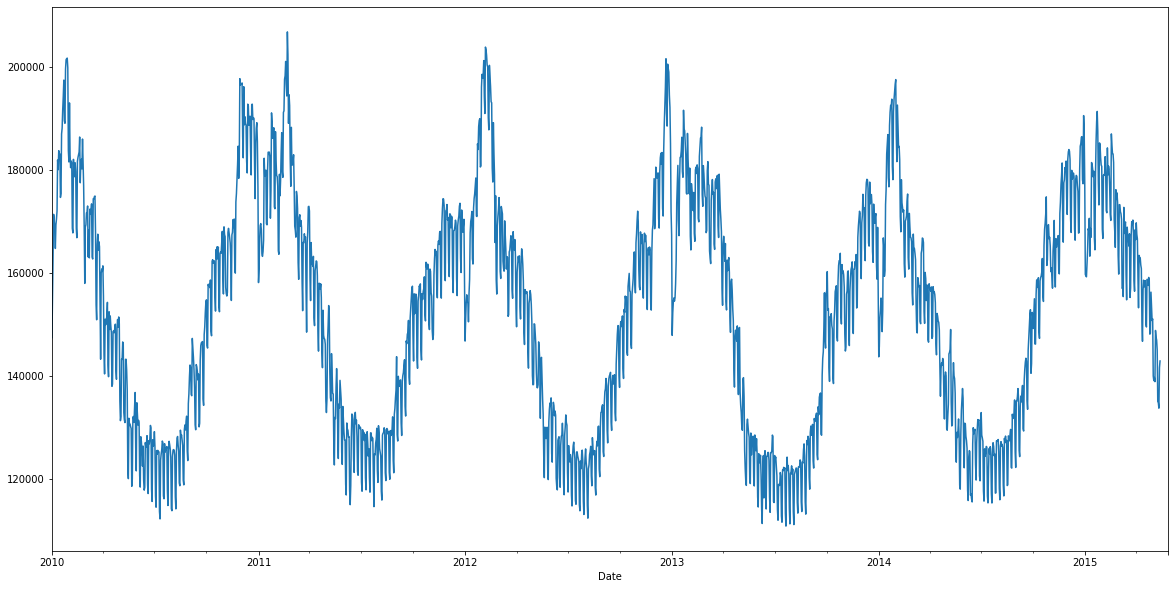

In [36]:
en_df['EnergyConsump'].plot(figsize=(20,10))

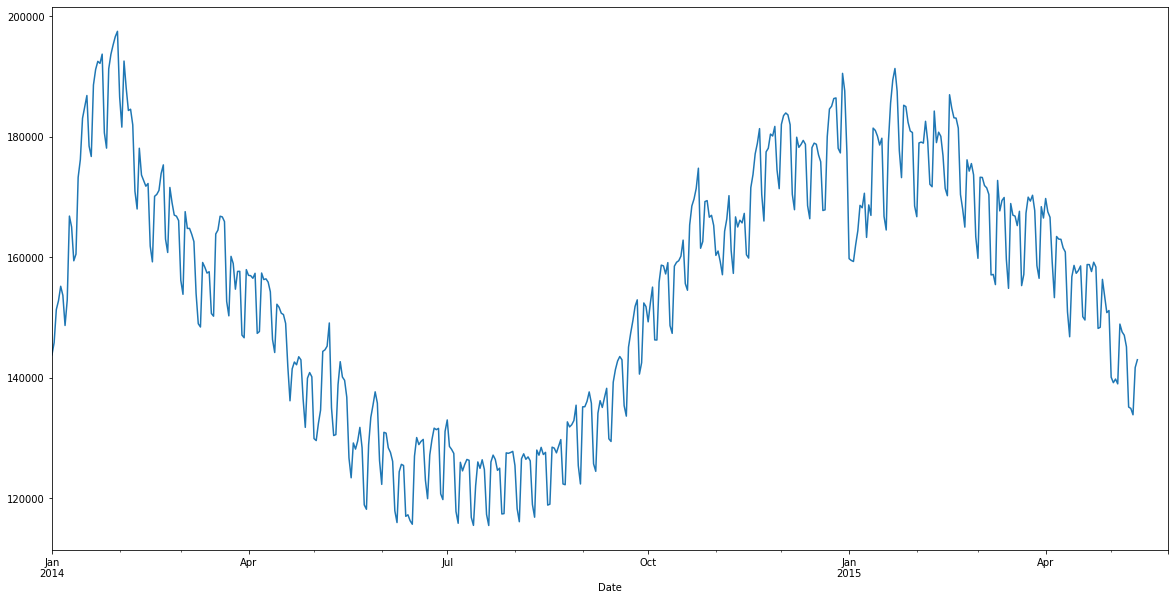

In [37]:
en_df.loc['2014-01-01':'2016-01-01', 'EnergyConsump'].plot(figsize=(20,10))

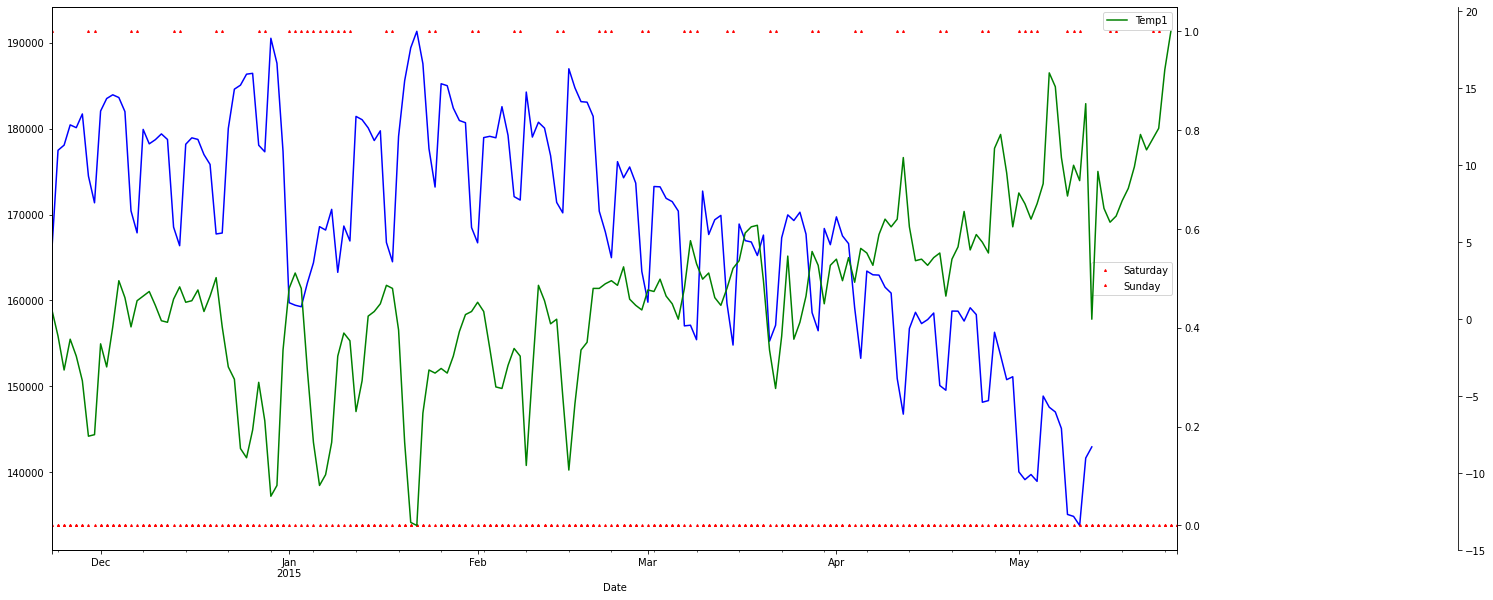

In [42]:
# driver analysis

fig, ax = plt.subplots(figsize=(25,10))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_label('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

en_df['EnergyConsump'].tail(186).plot(ax=ax, style= 'b-')
en_df[['Saturday', 'Sunday']].tail(186).plot(ax=ax2, style= 'r', marker='^', markersize=2.0,linewidth=0.0)
en_df[['Temp1']].tail(186).plot(ax=ax3, style= 'g-')

lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()

# Timeseries in Manifucturing


$W_t = N^1_t\cdot p^1_t + \cdot\cdot\cdot + N^K_t\cdot p^K_t$

$p^K_t$ - это производительность работников для выполнения задачи k в день t

$N^K_t$ - является рабочей нагрузкой на задачу задачи k в день t

In [43]:
ww_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/ww_statistics.csv', decimal='.', parse_dates=['day'], index_col='day', dayfirst=False)
ww_df.head()

,GSM pcs,Accessories pcs,DECT pcs,Battery pcs,Photo pcs,Offline stores,Online Orders,New Stores,Accessories lines,Total lines,Cards pcs,SIM pcs,main manhours,cargo manhours,students manhours,total manhours
day,,,,,,,,,,,,,,,,
2009-12-24,12192.0,33500.0,63778.0,NaN,8263.0,495.0,NaN,NaN,NaN,NaN,19405.0,1665.0,NaN,NaN,NaN,NaN
2009-12-25,10800.0,28800.0,21464.0,NaN,5800.0,429.0,NaN,NaN,NaN,NaN,23973.0,12284.0,NaN,NaN,NaN,NaN
2009-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-27,2985.0,7170.0,3226.0,NaN,1710.0,432.0,NaN,NaN,NaN,NaN,7184.0,1146.0,NaN,NaN,NaN,NaN
2009-12-28,5309.0,57789.0,5872.0,NaN,2492.0,283.0,NaN,NaN,NaN,NaN,1369.0,336.0,NaN,NaN,NaN,NaN


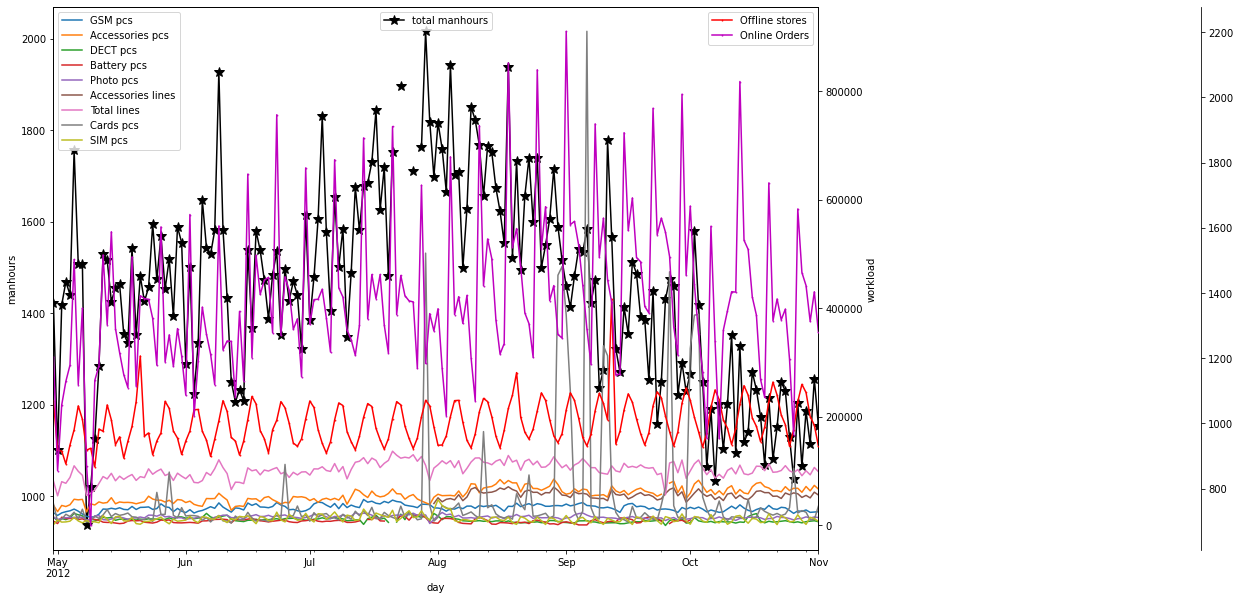

In [48]:
fig, ax = plt.subplots(figsize=(25,10))
ax.set_ylabel('manhours')
ax2,ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('workload')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.5))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.55)

ww_df['total manhours'].tail(186).plot(ax=ax, style='k-', marker='*', markersize=10.0)
ww_df[list(ww_df.columns[:5])+list(ww_df.columns[8:12])].tail(186).plot(ax = ax2)
ww_df.iloc[:, 5:7].tail(186).plot(ax=ax3, style=['r', 'm'], marker='^', markersize=1.0)
ax.legend(loc = 'upper center')
ax2.legend(loc = 'upper left')

# Timeseries in Nture

In [49]:
ss_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/Sunspots.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date') 
ss_df = ss_df[[ss_df.columns[1]]]
ss_df.tail(10)

,Monthly Mean Total Sunspot Number
Date,
2020-04-30,5.2
2020-05-31,0.2
2020-06-30,5.8
2020-07-31,6.1
2020-08-31,7.5
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0
2020-12-31,21.8


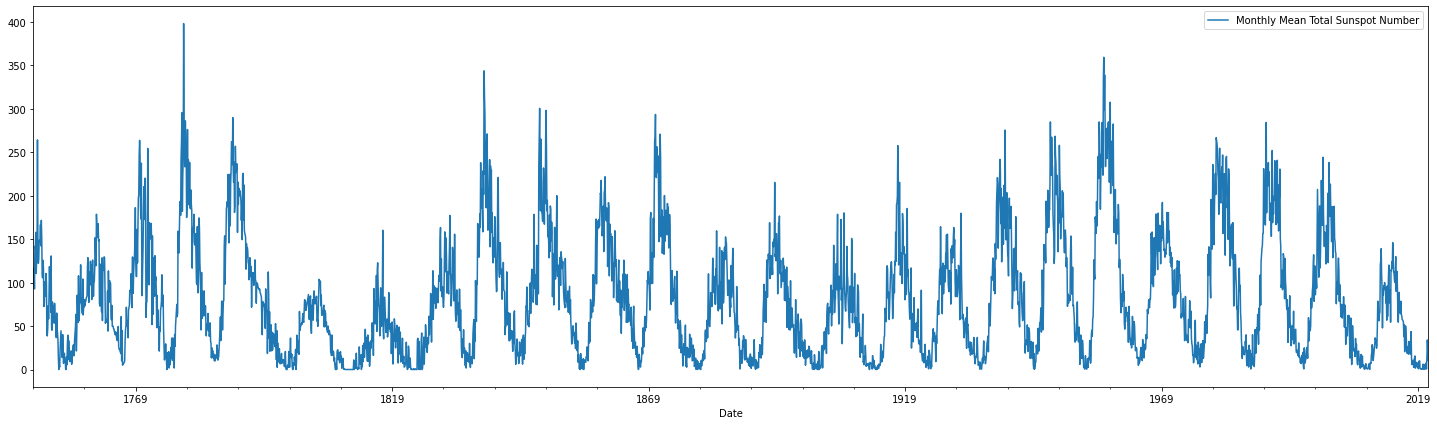

In [50]:
ss_df.plot(figsize=(25,7))

# Time Series Forecasting Problem

In [57]:
from google.colab import files
from IPython.display import Image

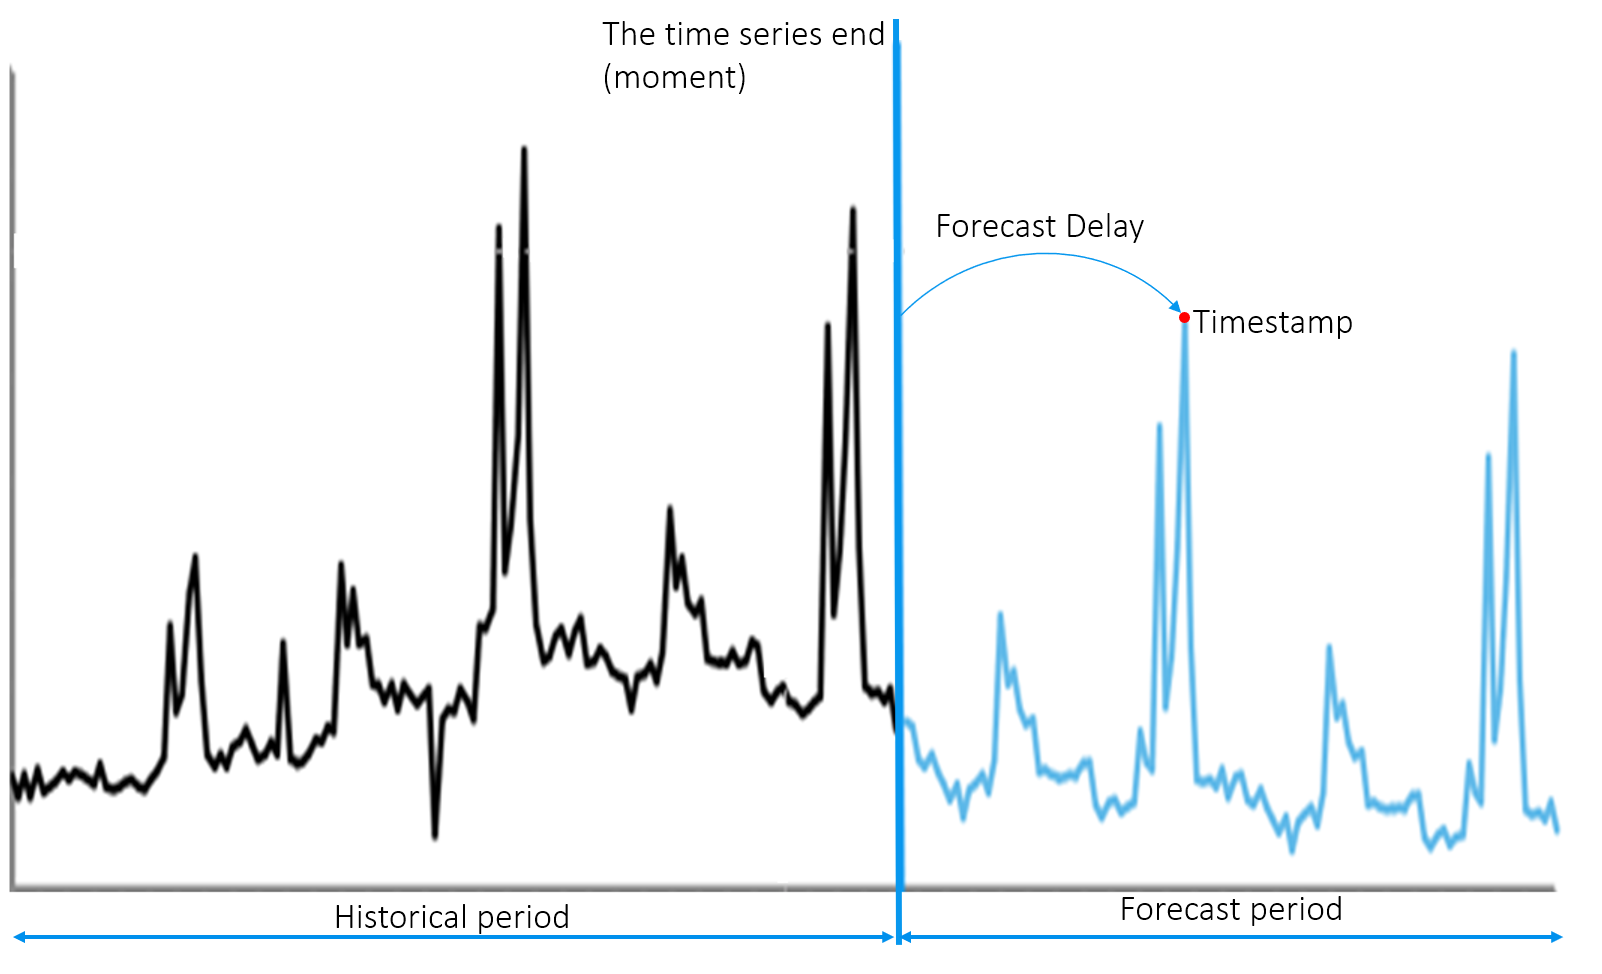

In [58]:
Image('/content/definitions.png', height=500, width=1000)

Def0. The time series is a series of data points taken at successive equally spaced points in time indexed in time order.

Def1. The forecast period is the period of time into the future for which forecasts are to be prepared.The forecast period usually is started just after the moment when the last actual value is known (the end of time series) and inlcudes several timestamps.

Def2. Let we a given a particular timestamp  of the forecast period. The forecast delay describes how far  is located from the end of time series.

Def3. The forecast horizon is length of the forecast period . The forecast horizon is measured in timestamps (forcast horizon is 52). In business communications the forecast horizon usually is descibed in time intervals (2 years, 24 months, 104 weeks).

These generally vary from short-term forecasting horizons (less than three months) to long-term horizons (more than two years).

# Hidden components of a time series

level --- attitude of a time series ar a moment  (usually is equal 

to original value)

trend - speed of incremental increase/descrease of level compnent

seasonality - cyclic component of a time series

noise (errors) - random component of a time series


In [59]:
ech_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption_hours.csv', sep=',', parse_dates=['Date'], dayfirst=False, index_col='Date') 
ech_df.tail(10)

,EnergyCons,Dev,WeekDay
Date,,,
2007-12-31 14:00:00,1976,-13,1
2007-12-31 15:00:00,1968,-14,1
2007-12-31 16:00:00,1914,-14,1
2007-12-31 17:00:00,1859,-13,1
2007-12-31 18:00:00,1830,-13,1
2007-12-31 19:00:00,1719,-13,1
2007-12-31 20:00:00,1621,-12,1
2007-12-31 21:00:00,1516,-12,1
2007-12-31 22:00:00,1459,-11,1


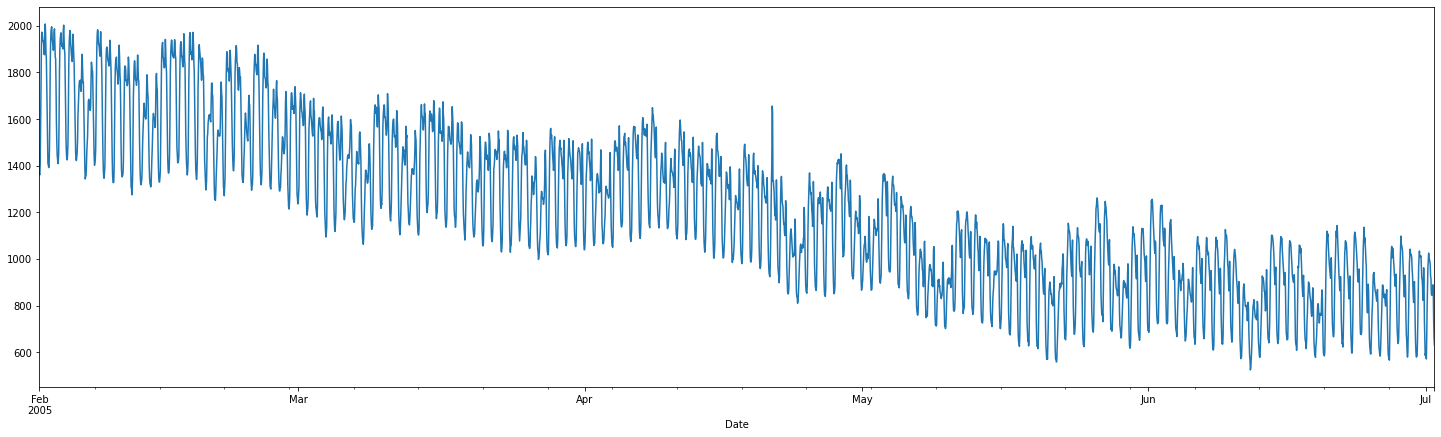

In [60]:
#  original time granularity
ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].plot(figsize=(25,7))

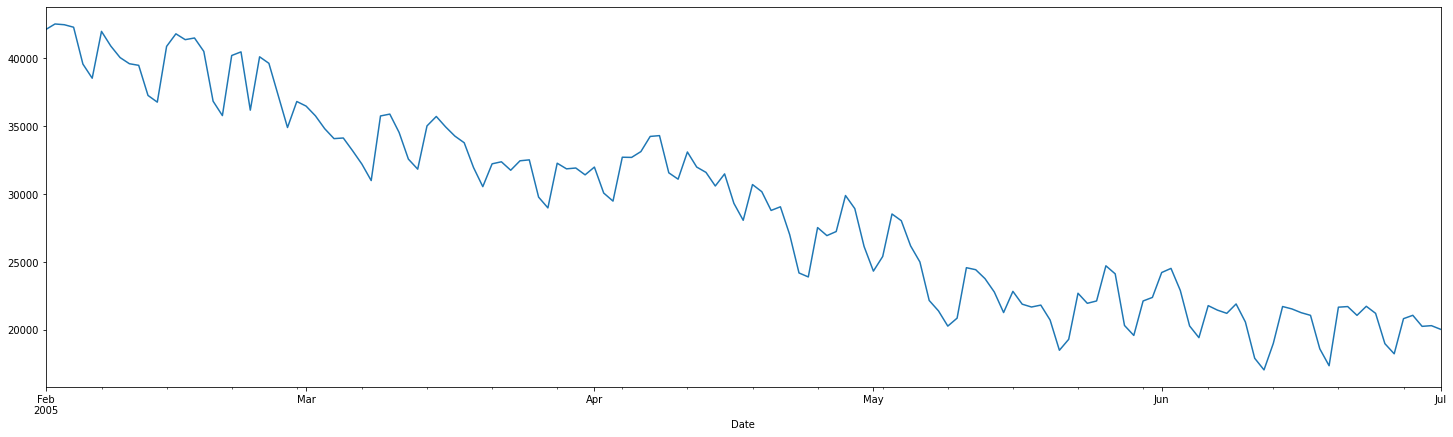

In [61]:
 #  daily time granularity
 ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot(figsize=(25,7))

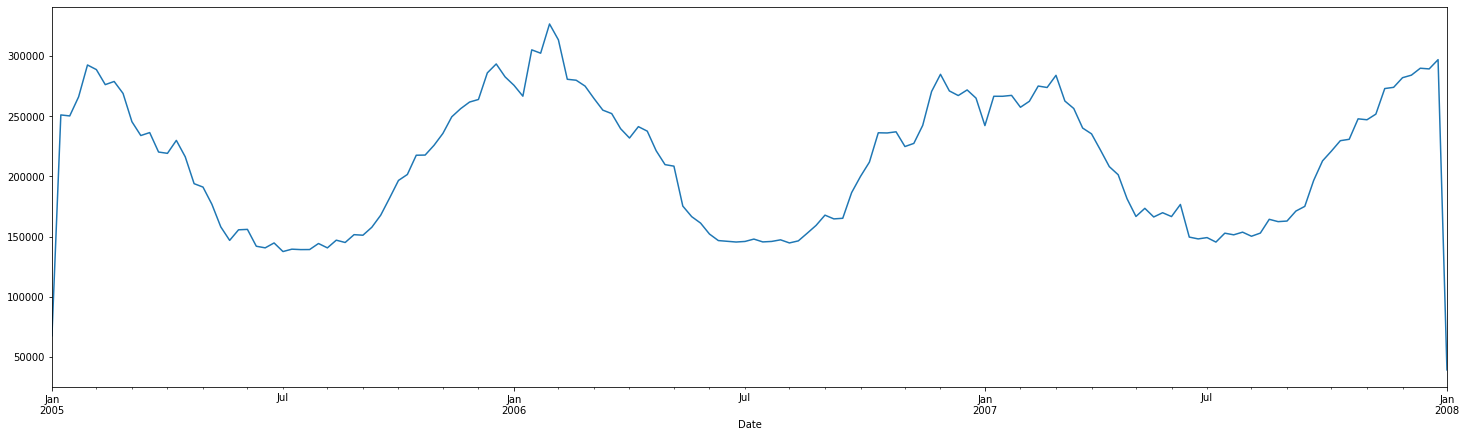

In [63]:
#  weekly time granularity
ech_df['EnergyCons'].resample("W").sum().plot(figsize=(25,7))

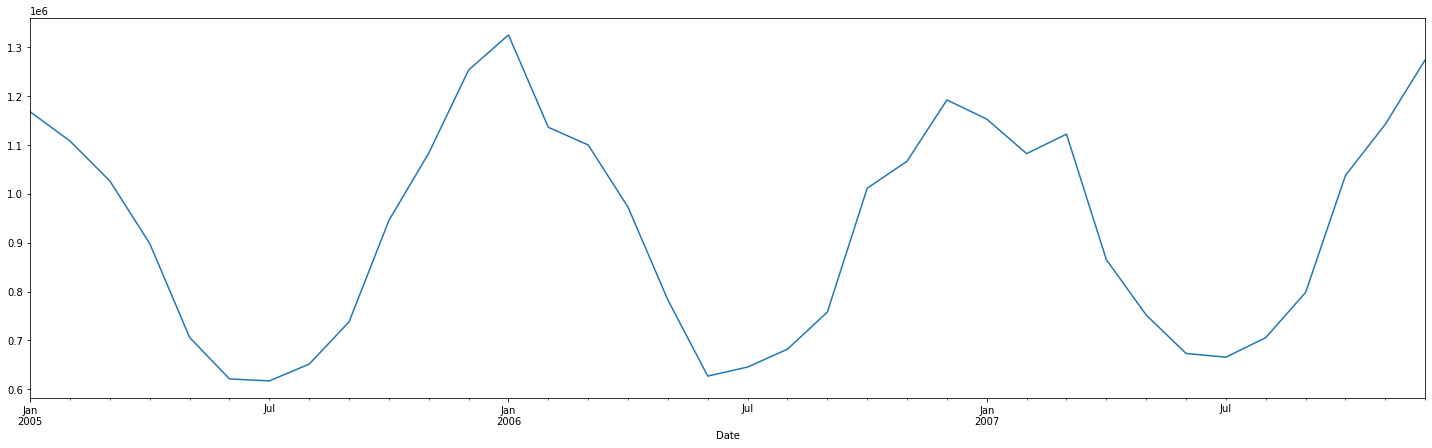

In [64]:
 #  monthly time granularity
 ech_df['EnergyCons'].resample("M").sum().plot(figsize=(25,7))

In [65]:
import statsmodels.api as sm

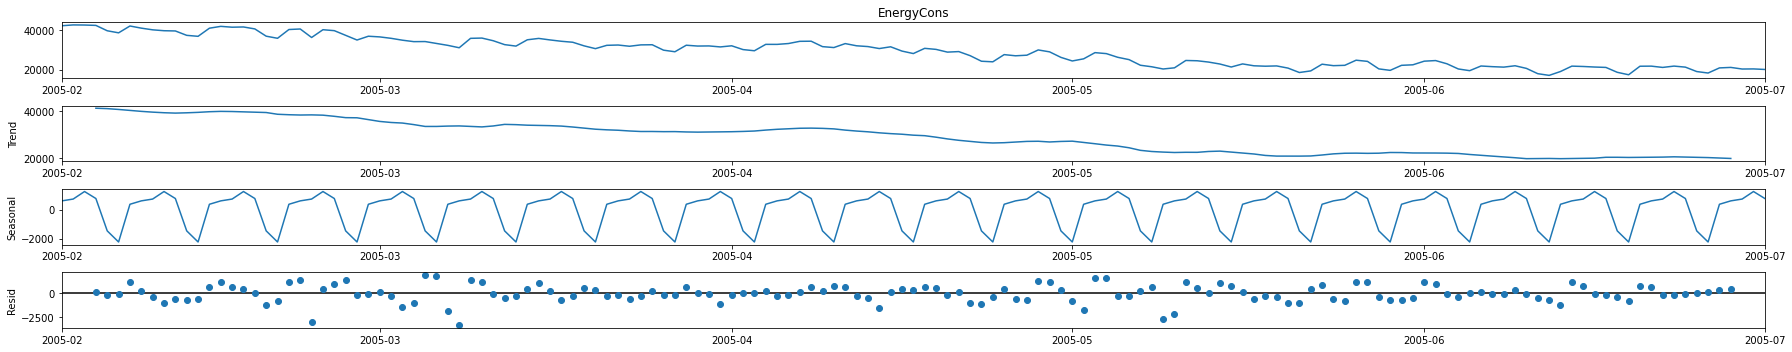

In [66]:
# automaticall calculate components 
res = sm.tsa.seasonal_decompose(ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
plt.rc("figure", figsize=(25,5))
resplot = res.plot()

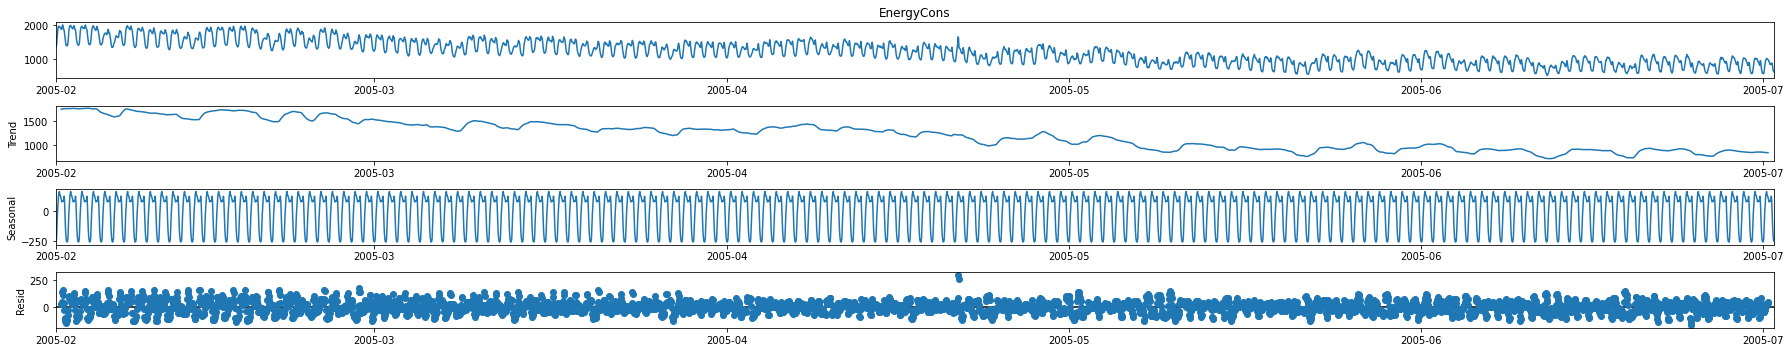

In [67]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].resample("H").sum())
plt.rc("figure", figsize=(25,5))
resplot = res.plot()

# Simple ts Forecasting Approaches

In [68]:
ech_df['EnergyCons'].tail(14)

Date
2007-12-31 10:00:00    1692
2007-12-31 11:00:00    1669
2007-12-31 12:00:00    1688
2007-12-31 13:00:00    1817
2007-12-31 14:00:00    1976
2007-12-31 15:00:00    1968
2007-12-31 16:00:00    1914
2007-12-31 17:00:00    1859
2007-12-31 18:00:00    1830
2007-12-31 19:00:00    1719
2007-12-31 20:00:00    1621
2007-12-31 21:00:00    1516
2007-12-31 22:00:00    1459
2007-12-31 23:00:00    1406
Name: EnergyCons, dtype: int64

In [69]:
# shift within time series
ech_df['EnergyCons'].shift(7).tail(7)

Date
2007-12-31 17:00:00    1692.0
2007-12-31 18:00:00    1669.0
2007-12-31 19:00:00    1688.0
2007-12-31 20:00:00    1817.0
2007-12-31 21:00:00    1976.0
2007-12-31 22:00:00    1968.0
2007-12-31 23:00:00    1914.0
Name: EnergyCons, dtype: float64

In [70]:
# one of possible naive forecasting algorithms
def naive_forecast(x, h):
  return x.shift(h)

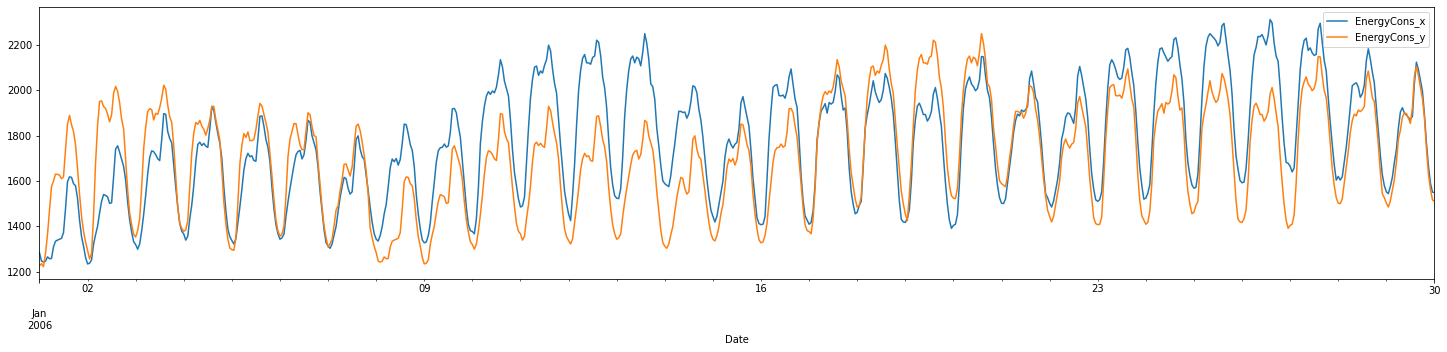

In [71]:
ech_df[['EnergyCons']].merge(naive_forecast(x=ech_df[['EnergyCons']], h = 168), how='left', left_index = True, right_index = True )['2006-01-01 00:00:00':'2006-01-30 00:00:00'].plot()

# Simple autoregression

In [72]:
# hankel matrix https://en.wikipedia.org/wiki/Hankel_matrix
sc.linalg.hankel([1,2,3,4, 5, 6, 7, 8], [8,9,10,11,12])

array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12]])

In [73]:
def get_autoregrmatrix(x,h,K):
    T = len(x)
    X = sc.linalg.hankel(x[:T-h-K+1], 
                          np.hstack((x[T-h-K:T-h]))) # is needed to repeat x[-K] in second part
    y = x[K+h-1:]
    return X,y
# Train, answer = get_autoregrmatrix(x,h=1,K=10)

# Forecast for the next hour (delay=1)


In [75]:
x_train = ech_df['EnergyCons']['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_train

Date
2005-01-01 00:00:00    1290
2005-01-01 01:00:00    1266
2005-01-01 02:00:00    1273
2005-01-01 03:00:00    1280
2005-01-01 04:00:00    1293
                       ... 
2005-12-31 20:00:00    1541
2005-12-31 21:00:00    1394
2005-12-31 22:00:00    1349
2005-12-31 23:00:00    1312
2006-01-01 00:00:00    1284
Name: EnergyCons, Length: 8761, dtype: int64

In [78]:
K=168
h = 1 # delay
# T - все временные метки
# K - длина временного ряда
# T-h-K+1 = 8761 - 1 - 168 + 1 = 8593
# T-h-K = 8761 - 1 - 168 = 8593/ T-h = 8760 => 8593:8760 => len=168
# 8593*168
x_train = ech_df['EnergyCons']['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test =  ech_df['EnergyCons']['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [80]:
# Autoregression Matrix (rows - Samples, Columns = Regressors)
y_train.shape

(8593,)

Train score: 0.997, Test score: 0.991


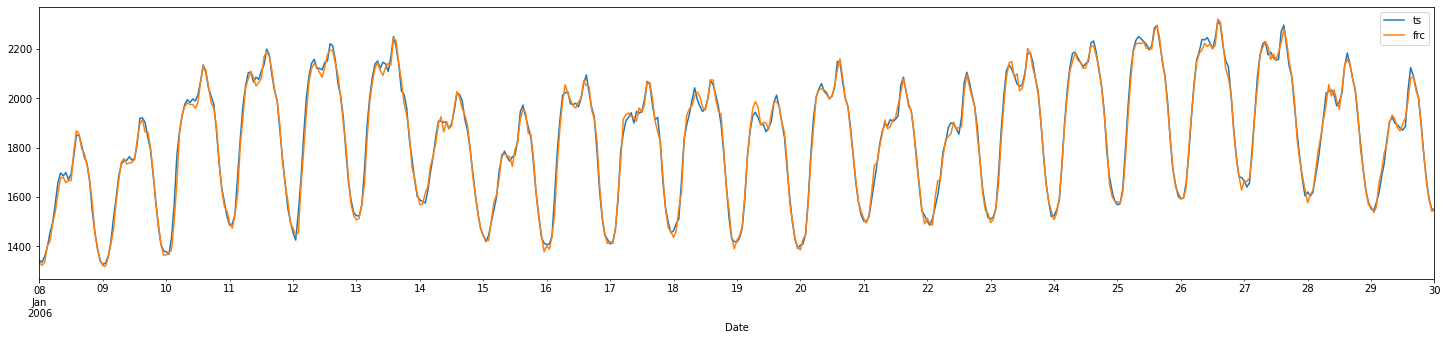

In [81]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize = (25,5))

Try another delay: h=168

Train score: 0.933, Test score: 0.651


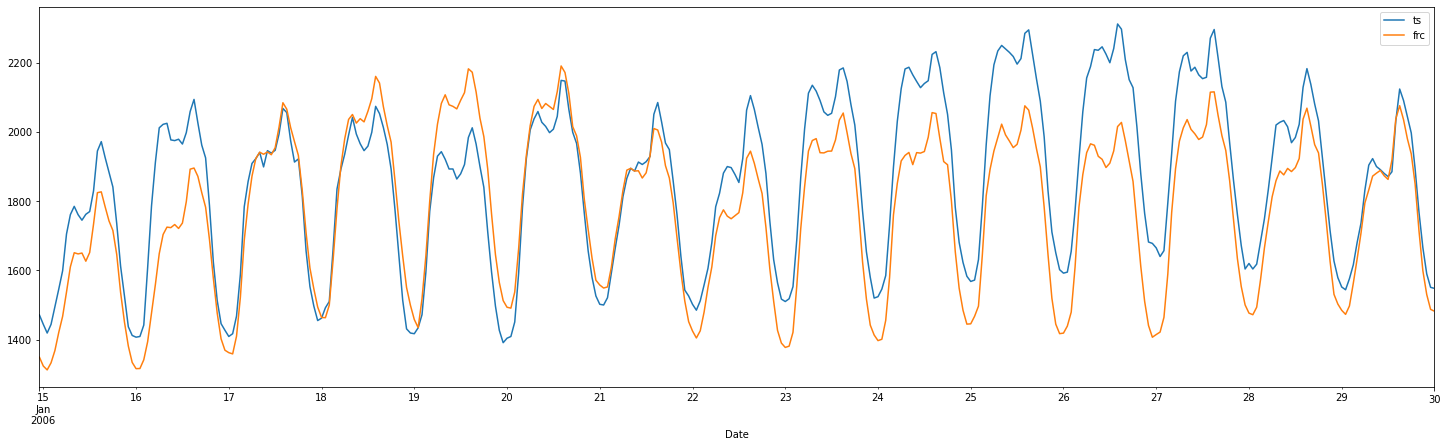

In [82]:
K=168
h = 168 # delay

x_train = ech_df['EnergyCons']['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ech_df['EnergyCons']['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(25,7))

Practical Task (optional)
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting problem. You should write down code to show dependence for . You can choose amount of regressors of LR in experiment as much as you want.